In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import xlsx

In [28]:
fact_homicidios = pd.read_excel('./homicidios.xlsx', sheet_name='HECHOS')
victim_homicidios = pd.read_excel('./homicidios.xlsx', sheet_name='VICTIMAS')

In [29]:
fact_homicidios.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [30]:
fact_homicidios.shape

(696, 21)

In [31]:
victim_homicidios.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


In [32]:
victim_homicidios.shape

(717, 10)

## Descriptive statistics

In [33]:
fact_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [34]:
fact_homicidios['VICTIMA'] = fact_homicidios['VICTIMA'].astype('category')
fact_homicidios['ACUSADO'] = fact_homicidios['ACUSADO'].astype('category')
fact_homicidios['TIPO_DE_CALLE'] = fact_homicidios['TIPO_DE_CALLE'].astype('category')

In [35]:
victim_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [36]:
victim_homicidios['ROL'] = victim_homicidios['ROL'].astype('category')
victim_homicidios['VICTIMA'] = victim_homicidios['VICTIMA'].astype('category')
victim_homicidios['SEXO'] = victim_homicidios['SEXO'].astype('category')

The data type was changed to category in the corresponding columns.

## Nulls

In [37]:
fact_homicidios.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [38]:
victim_homicidios.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [39]:
nulls_pct_fact_homidicios = pd.DataFrame(fact_homicidios.isna().sum()/len(fact_homicidios)).reset_index()
nulls_pct_fact_homidicios.columns = ['column_name', 'nulls_percentage']
nulls_pct_fact_homidicios

,column_name,nulls_percentage
0,ID,0.000000
1,N_VICTIMAS,0.000000
2,FECHA,0.000000
3,AAAA,0.000000
4,MM,0.000000
5,DD,0.000000
6,HORA,0.000000
7,HH,0.000000
8,LUGAR_DEL_HECHO,0.000000
9,TIPO_DE_CALLE,0.000000


In [40]:
nan_pct_fact_homidicios = fact_homicidios.isna().mean().mean() * 100
print(f"Percentage of missing values: {nan_pct_fact_homidicios:.2f}%")

Percentage of missing values: 5.11%


## Distributions 

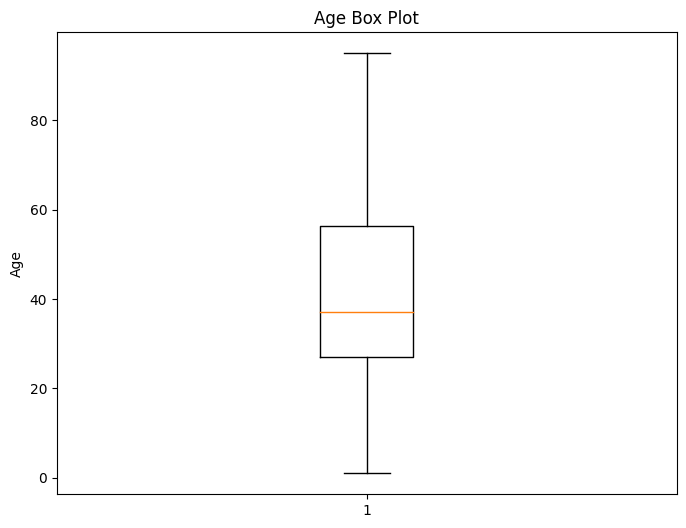

In [42]:
victim_homicidios_numeric = pd.DataFrame()
victim_homicidios_numeric['EDAD'] = pd.to_numeric(victim_homicidios['EDAD'], errors='coerce')
victim_homicidios_numeric = victim_homicidios_numeric.dropna(subset=['EDAD'])
victim_homicidios_numeric = victim_homicidios_numeric.astype(int)

plt.figure(figsize=(8, 6))
plt.boxplot(victim_homicidios_numeric['EDAD'])
plt.title('Age Box Plot')
plt.ylabel('Age')
plt.show()

Among the victims, the minimum age is one year and the maximum age exceeds 80 years. In addition, 50% of the data is in the range of over 20 and under 60, i.e., between young and middle-aged adults.

## Charts

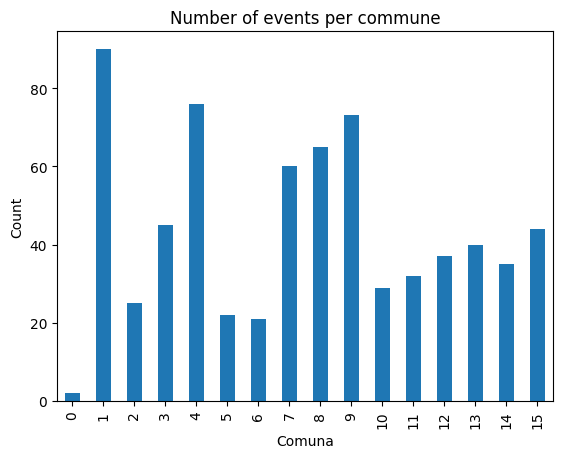

In [44]:
comuna_count = fact_homicidios['ID'].groupby(fact_homicidios['COMUNA']).count()

comuna_count.plot(kind='bar')
plt.title('Number of events per commune')
plt.xlabel('Comuna')
plt.ylabel('Count')

plt.show()

Commune 1 has the highest number of accidents.

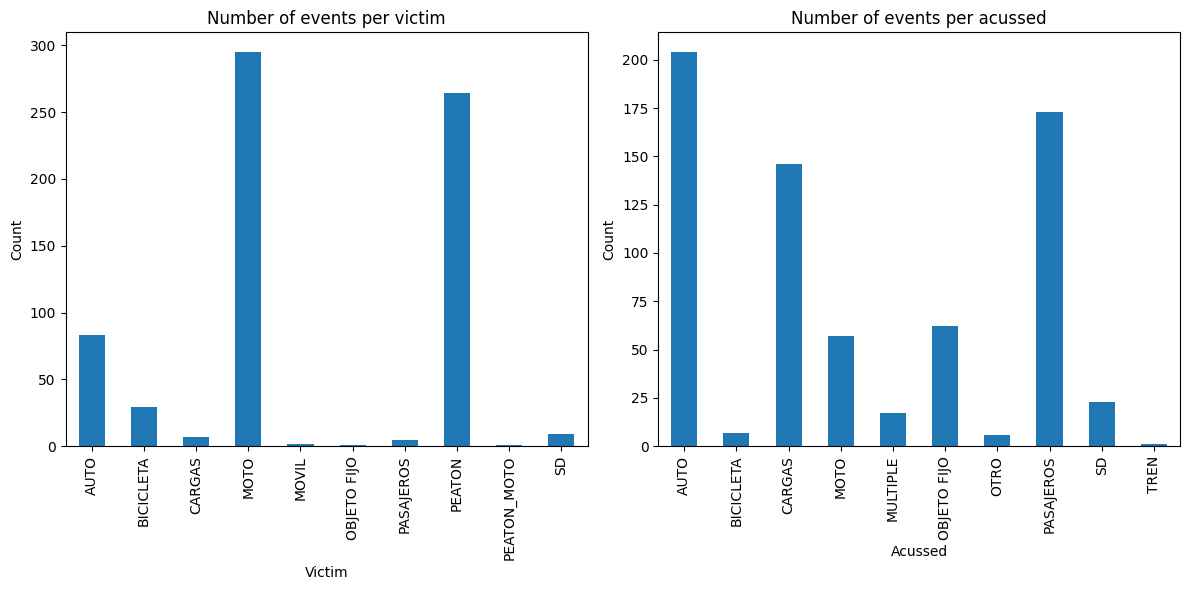

In [45]:
victim_count = fact_homicidios['ID'].groupby(fact_homicidios['VICTIMA']).count()
acussed_count = fact_homicidios['ID'].groupby(fact_homicidios['ACUSADO']).count()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
victim_count.plot(kind='bar')
plt.title('Number of events per victim')
plt.xlabel('Victim')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
acussed_count.plot(kind='bar')
plt.title('Number of events per acussed')
plt.xlabel('Acussed')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The most common victims are motorcycles and pedestrians.  And, the most frequent accused are cars.

<Axes: xlabel='EDAD', ylabel='Count'>

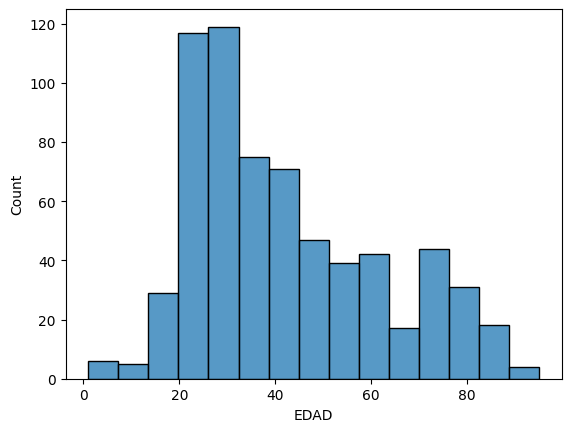

In [46]:
sns.histplot(data=victim_homicidios_numeric,x='EDAD')

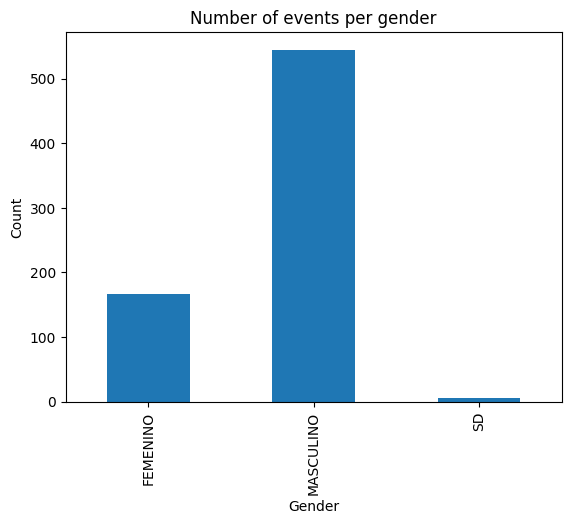

In [49]:
gender_count = victim_homicidios['ID_hecho'].groupby(victim_homicidios['SEXO']).count()

gender_count.plot(kind='bar')
plt.title('Number of events per gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

The sex with the highest number of accidents was male.